In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files 
files.upload()

In [ ]:
%%bash

mkdir ~/.kaggle 
cp kaggle.json ~/.kaggle/
chmod 600 ~/.kaggle/kaggle.json
kaggle datasets list
kaggle competitions download -c dogs-vs-cats

In [ ]:
%%bash

mkdir train
unzip train.zip -d train 
mkdir test1
unzip test1.zip -d test1 
mkdir dogs-vs-cats

# Dataset

In [ ]:
import os, shutil
 
# The path to the directory where the original dataset was uncompressed
train_dataset_path = 'train'
original_dataset_dir = 'train/train'
 
# The directory where we will store our smaller dataset
base_dir = 'dogs-vs-cats/small'
os.mkdir(base_dir)
 
# Directories for our training, validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)
 
# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
 
# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)
 
# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
 
# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)
 
# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
 
# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)
 
# Copy first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
 
# Copy next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
 
# Copy next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
 
# Copy first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
 
# Copy next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
 
# Copy next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

# Network architecture

In [ ]:
# Configure the model
from keras import models
from keras import layers
 
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [ ]:
# Compile the model
import tensorflow as tf

opt = tf.keras.optimizers.RMSprop(
        learning_rate=0.0001,
        rho=0.9,
        momentum=0.0,
        epsilon=1e-07,
        centered=False,
        name="RMSprop"
      )

model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Data preprocessing

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
 
train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
100/100 [==============================] - 12s 117ms/step - loss: 0.6885 - accuracy: 0.5410 - val_loss: 0.6771 - val_accuracy: 0.5800
Epoch 2/30
100/100 [==============================] - 12s 117ms/step - loss: 0.6629 - accuracy: 0.6210 - val_loss: 0.6438 - val_accuracy: 0.6310
Epoch 3/30
100/100 [==============================] - 12s 117ms/step - loss: 0.6213 - accuracy: 0.6610 - val_loss: 0.6306 - val_accuracy: 0.6290
Epoch 4/30
100/100 [==============================] - 11s 114ms/step - loss: 0.5726 - accuracy: 0.6930 - val_loss: 0.6134 - val_accuracy: 0.6650
Epoch 5/30
100/100 [==============================] - 12s 117ms/step - loss: 0.5372 - accuracy: 0.7195 - val_loss: 0.5909 - val_accuracy: 0.6770
Epoch 6/30
100/100 [==============================] - 12s 115ms/step - loss: 0.5112 - accuracy: 0.7465 - val_loss: 0.5750 - val_accuracy: 0.6870
Epoch 7/30
100/100 [==============================] - 

# Outcome analysis

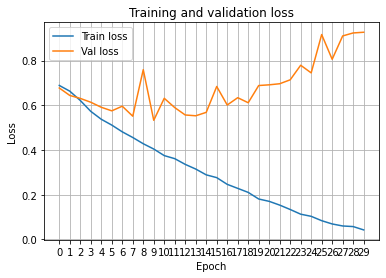

In [ ]:
history_dict = history.history

# Plot loss 
import matplotlib.pyplot as plt
import numpy as np

epochs = np.arange(0, 30)
plt.plot(epochs, history_dict['loss'], history_dict['val_loss'])
plt.xlabel('Epoch'), plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.legend(('Train loss', 'Val loss'))
plt.xticks(epochs)
plt.grid(True)
plt.show()

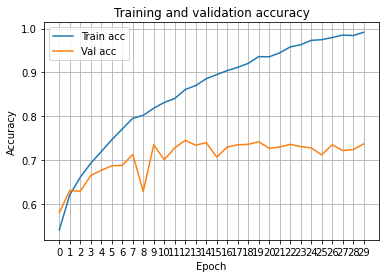

In [ ]:
# Plot accuracy
plt.plot(epochs, history_dict['accuracy'], history_dict['val_accuracy'])
plt.xlabel('Epoch'), plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(('Train acc', 'Val acc'))
plt.xticks(epochs)
plt.grid(True)
plt.show()

# Data Augmentation

In [ ]:
datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

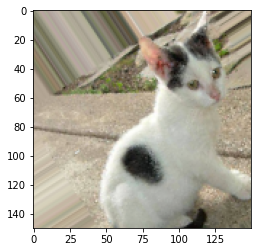

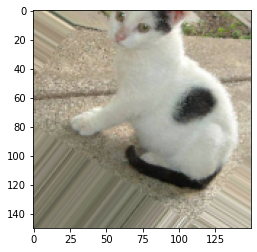

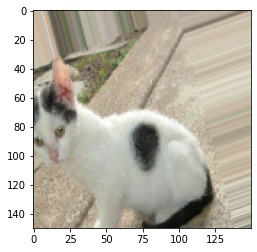

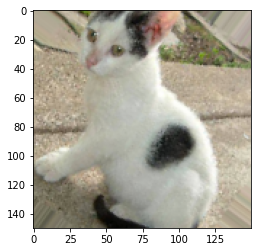

In [ ]:
# This is module with image preprocessing utilities
from keras.preprocessing import image
from matplotlib import pyplot as plt
 
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
 
# We pick one image to "augment"
img_path = fnames[3]
 
# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))
 
# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)
 
# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)
 
# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
 
plt.show()

In [ ]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
 
# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)
 
train_generator = train_datagen.flow_from_directory(
        # Set target directory:
        train_dir,
        # Resize images to 150x150 pixels:
        target_size=(150, 150),
        # Experiment with different batches:
        batch_size=20,
        # Labels needed for binary_crossentropy loss:
        class_mode='binary')
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')
 
history_aug = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 20s 197ms/step - loss: 0.6897 - accuracy: 0.6930 - val_loss: 0.5820 - val_accuracy: 0.7010
Epoch 2/100
100/100 [==============================] - 19s 194ms/step - loss: 0.5704 - accuracy: 0.7050 - val_loss: 0.5188 - val_accuracy: 0.7520
Epoch 3/100
100/100 [==============================] - 20s 196ms/step - loss: 0.5797 - accuracy: 0.6950 - val_loss: 0.5462 - val_accuracy: 0.7130
Epoch 4/100
100/100 [==============================] - 19s 194ms/step - loss: 0.5383 - accuracy: 0.7225 - val_loss: 0.4877 - val_accuracy: 0.7660
Epoch 5/100
100/100 [==============================] - 19s 194ms/step - loss: 0.5465 - accuracy: 0.7290 - val_loss: 0.5102 - val_accuracy: 0.7520
Epoch 6/100
100/100 [==============================] - 20s 197ms/step - loss: 0.5469 - accuracy: 0.7180 - val_loss: 0.4897 - val_accuracy: 0.7560
Epoch 7/100
100/100 [===================

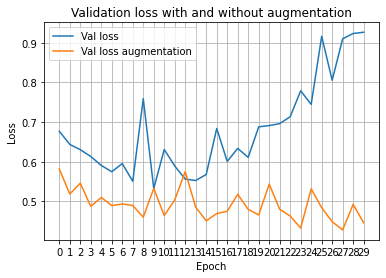

In [ ]:
# Plot the results
history_aug_dict = history_aug.history

# Plot loss 
epochs = np.arange(0, 30)
plt.plot(epochs, history_dict['val_loss'], (history_aug_dict['val_loss'])[:30])
plt.xlabel('Epoch'), plt.ylabel('Loss')
plt.title('Validation loss with and without augmentation')
plt.legend(('Val loss', 'Val loss augmentation'))
plt.xticks(epochs)
plt.grid(True)
plt.show()

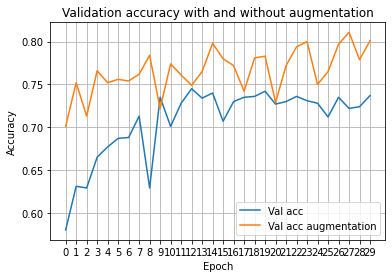

In [ ]:
# Plot accuracy 
epochs = np.arange(0, 30)
plt.plot(epochs, history_dict['val_accuracy'], (history_aug_dict['val_accuracy'])[:30])
plt.xlabel('Epoch'), plt.ylabel('Accuracy')
plt.title('Validation accuracy with and without augmentation')
plt.legend(('Val acc', 'Val acc augmentation'))
plt.xticks(epochs)
plt.grid(True)
plt.show()